In [356]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

### Datos

In [357]:
poblacion = pd.read_csv('Data/Training_Data/Poblacion_2021.csv', sep=';', index_col=0)
admisiones = pd.read_excel('Data/Training_Data/Admisiones_2021_new.xls', header=[0,1], index_col=0)
admisiones.rename(columns={'Unnamed: 0_level_0': 'Facultad / Programa', 'Facultad y Programa': ''}, inplace=True)
titulos_otorgados = pd.read_csv('Data/Training_Data/Titulos_2021.csv', sep=';', index_col=0)

In [358]:
#Lista de programas que se van a considerar
programas = ['Biología', 'Física', 'Geociencias', 'Matemáticas', 'Microbiología', 'Química']

### Datos de poblacion por periodo académico y por programa

In [359]:
poblacion_ciencias = poblacion.loc[programas].fillna(0).T.reset_index()
poblacion_ciencias = poblacion_ciencias.melt(id_vars=['index'], value_vars=programas)
poblacion_ciencias.columns = ['Periodo','Programa','Poblacion']
poblacion_ciencias.head()

,Periodo,Programa,Poblacion
0,1997-2,Biología,226.0
1,1998-2,Biología,224.0
2,1999-1,Biología,229.0
3,1999-2,Biología,222.0
4,2000-1,Biología,231.0


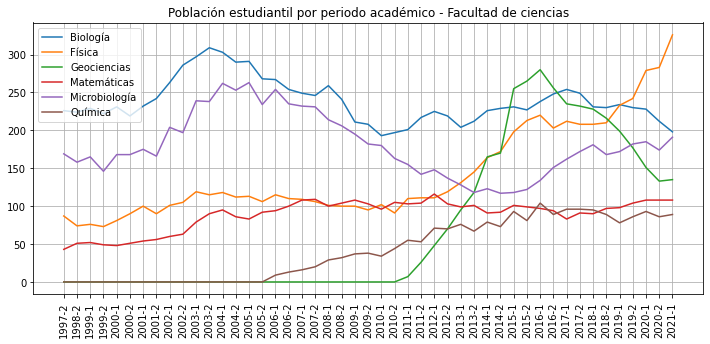

In [390]:
plt.figure(figsize=(12,5))
for i in programas:
    tiempo = poblacion_ciencias[poblacion_ciencias['Programa']==i].Periodo
    valor = poblacion_ciencias[poblacion_ciencias['Programa']==i].Poblacion
    plt.plot(tiempo, valor, label=i)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.title('Población estudiantil por periodo académico - Facultad de ciencias')
plt.grid()
plt.show()

### Datos de inscritos y matriculados por periodo académico y por programa

In [361]:
admisiones_ciencias = admisiones.loc[programas].fillna(0).T.reset_index().rename(columns={'Facultad y Programa':'Categoría'})
admisiones_ciencias = admisiones_ciencias.melt(id_vars=['level_0', 'Categoría'], value_vars=programas)
admisiones_ciencias = admisiones_ciencias.pivot(index=['level_0','variable'], columns='Categoría', values='value').reset_index()
admi_A = admisiones_ciencias.iloc[:156].drop(columns=['Admitidos (primera y segunda opción)', 'Inscritos (primera opción)'])
admi_B = admisiones_ciencias.iloc[156:].drop(columns=['Admitidos','Inscritos'])
admi_B = admi_B.rename(columns={'Admitidos (primera y segunda opción)':'Admitidos','Inscritos (primera opción)':'Inscritos'})
admisiones_ciencias = pd.concat([admi_A, admi_B]).drop(columns=['Admitidos','Nuevos del periodo','Reservas y Transferencias'])
admisiones_ciencias.columns = ['Periodo', 'Programa', 'Inscritos', 'Matriculados']
admisiones_ciencias.head()

,Periodo,Programa,Inscritos,Matriculados
0,2003-1,Biología,85.0,39.0
1,2003-1,Física,35.0,16.0
2,2003-1,Geociencias,0.0,0.0
3,2003-1,Matemáticas,18.0,11.0
4,2003-1,Microbiología,105.0,46.0


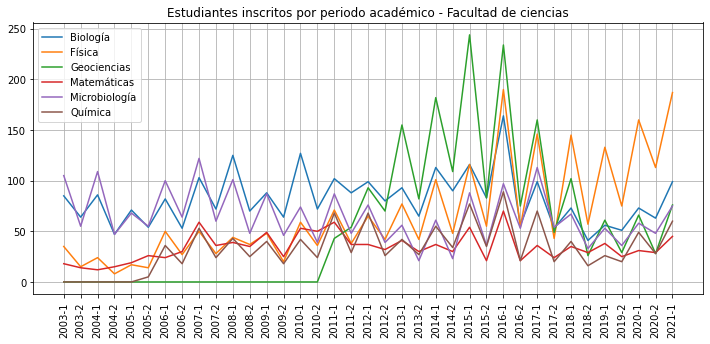

In [391]:
plt.figure(figsize=(12,5))
for i in programas:
    tiempo = admisiones_ciencias[admisiones_ciencias['Programa']==i].Periodo
    valor = admisiones_ciencias[admisiones_ciencias['Programa']==i].Inscritos
    plt.plot(tiempo, valor, label=i)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.title('Estudiantes inscritos por periodo académico - Facultad de ciencias')
plt.grid()
plt.show()

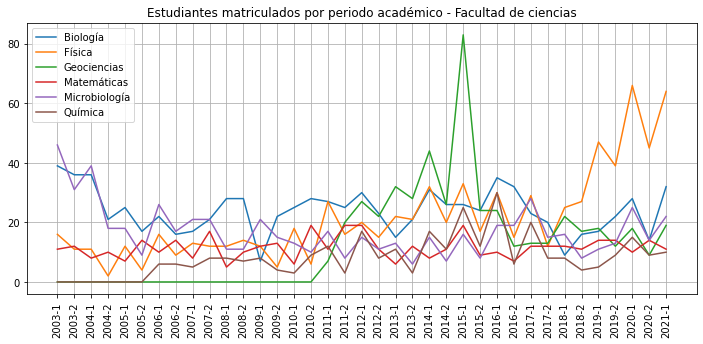

In [392]:
plt.figure(figsize=(12,5))
for i in programas:
    tiempo = admisiones_ciencias[admisiones_ciencias['Programa']==i].Periodo
    valor = admisiones_ciencias[admisiones_ciencias['Programa']==i].Matriculados
    plt.plot(tiempo, valor, label=i)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.title('Estudiantes matriculados por periodo académico - Facultad de ciencias')
plt.grid()
plt.show()

### Datos de titulos otorgados por periodo académico y por programa

In [364]:
titulos_ciencias = titulos_otorgados.loc[programas].fillna(0).T.reset_index()
titulos_ciencias = titulos_ciencias.melt(id_vars=['index'], value_vars=programas)
titulos_ciencias.columns = ['Periodo','Programa','Titulos']
titulos_ciencias.head()

,Periodo,Programa,Titulos
0,2002-1,Biología,19.0
1,2002-2,Biología,25.0
2,2003-1,Biología,18.0
3,2003-2,Biología,19.0
4,2004-1,Biología,22.0


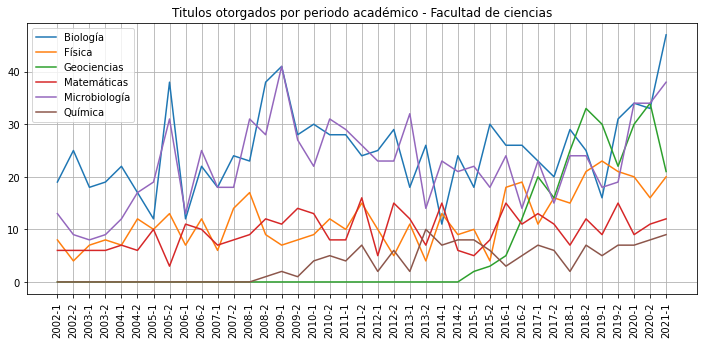

In [394]:
plt.figure(figsize=(12,5))
for i in programas:
    tiempo = titulos_ciencias[titulos_ciencias['Programa']==i].Periodo
    valor = titulos_ciencias[titulos_ciencias['Programa']==i].Titulos
    plt.plot(tiempo, valor, label=i)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.title('Titulos otorgados por periodo académico - Facultad de ciencias')
plt.grid()
plt.show()

### Dataset completo

In [395]:
data = admisiones_ciencias.merge(poblacion_ciencias, how='inner', on=['Periodo','Programa'])
data = data.merge(titulos_ciencias, how='inner', on=['Periodo','Programa'])
data = data.sort_values(by=['Programa', 'Periodo']).reset_index().drop(columns='index')
data.head()

,Periodo,Programa,Inscritos,Matriculados,Poblacion,Titulos
0,2003-1,Biología,85.0,39.0,297.0,18.0
1,2003-2,Biología,64.0,36.0,309.0,19.0
2,2004-1,Biología,86.0,36.0,303.0,22.0
3,2004-2,Biología,47.0,21.0,290.0,17.0
4,2005-1,Biología,71.0,25.0,291.0,12.0


In [396]:
Caracteristicas = ['Inscritos', 'Matriculados', 'Poblacion', 'Titulos']

A continuación se define una función que duplica las columnas 'Inscritos', 'Matriculados', 'Poblacion' y 'Titulos' 9 veces pero desplazandolas en el eje vertical en hasta 9 filas. Esto se hace con el fin de que cada fila contenga la informacion de los últimos 4.5 años adicional a la del periodo en cuestión.  
**Nota:** Se han eliminado las filas que agregan valores núlos.

In [397]:
def add_columns(df, programa):
    program_df = df[df['Programa']==programa]
    program_df2 = program_df.copy()
    for i in range(1,10,1):
        program_df2 = pd.concat([program_df2, program_df.shift(i)[Caracteristicas].add_suffix('_p{}'.format(10-i))], axis=1)
    return program_df2.dropna()

### Dataset con columnas adicionales

In [398]:
data2 = pd.concat([add_columns(data, x) for x in programas]).sort_values(by='Periodo').reset_index().drop(columns='index')
data2.head()

,Periodo,Programa,Inscritos,Matriculados,Poblacion,Titulos,Inscritos_p9,Matriculados_p9,Poblacion_p9,Titulos_p9,Inscritos_p8,Matriculados_p8,Poblacion_p8,Titulos_p8,Inscritos_p7,Matriculados_p7,Poblacion_p7,Titulos_p7,Inscritos_p6,Matriculados_p6,Poblacion_p6,Titulos_p6,Inscritos_p5,Matriculados_p5,Poblacion_p5,Titulos_p5,Inscritos_p4,Matriculados_p4,Poblacion_p4,Titulos_p4,Inscritos_p3,Matriculados_p3,Poblacion_p3,Titulos_p3,Inscritos_p2,Matriculados_p2,Poblacion_p2,Titulos_p2,Inscritos_p1,Matriculados_p1,Poblacion_p1,Titulos_p1
0,2007-2,Biología,72.0,21.0,246.0,24.0,103.0,17.0,249.0,18.0,53.0,16.0,254.0,22.0,82.0,22.0,267.0,12.0,54.0,17.0,268.0,38.0,71.0,25.0,291.0,12.0,47.0,21.0,290.0,17.0,86.0,36.0,303.0,22.0,64.0,36.0,309.0,19.0,85.0,39.0,297.0,18.0
1,2007-2,Geociencias,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007-2,Física,28.0,12.0,106.0,14.0,50.0,13.0,109.0,6.0,27.0,9.0,110.0,12.0,50.0,16.0,115.0,7.0,14.0,4.0,106.0,13.0,17.0,12.0,113.0,10.0,8.0,2.0,112.0,12.0,24.0,11.0,118.0,7.0,15.0,11.0,115.0,8.0,35.0,16.0,119.0,7.0
3,2007-2,Química,24.0,8.0,20.0,0.0,53.0,5.0,16.0,0.0,18.0,6.0,13.0,0.0,36.0,6.0,9.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007-2,Microbiología,60.0,21.0,231.0,18.0,122.0,21.0,232.0,18.0,64.0,17.0,235.0,25.0,100.0,26.0,254.0,13.0,55.0,9.0,234.0,31.0,68.0,18.0,263.0,19.0,47.0,18.0,253.0,17.0,109.0,39.0,262.0,12.0,55.0,31.0,238.0,9.0,105.0,46.0,239.0,8.0


### Entrenamiento de modelo - Gradient Boosting Regressor

In [459]:
data2.columns

Index(['Periodo', 'Programa', 'Inscritos', 'Matriculados', 'Poblacion',
       'Titulos', 'Inscritos_p9', 'Matriculados_p9', 'Poblacion_p9',
       'Titulos_p9', 'Inscritos_p8', 'Matriculados_p8', 'Poblacion_p8',
       'Titulos_p8', 'Inscritos_p7', 'Matriculados_p7', 'Poblacion_p7',
       'Titulos_p7', 'Inscritos_p6', 'Matriculados_p6', 'Poblacion_p6',
       'Titulos_p6', 'Inscritos_p5', 'Matriculados_p5', 'Poblacion_p5',
       'Titulos_p5', 'Inscritos_p4', 'Matriculados_p4', 'Poblacion_p4',
       'Titulos_p4', 'Inscritos_p3', 'Matriculados_p3', 'Poblacion_p3',
       'Titulos_p3', 'Inscritos_p2', 'Matriculados_p2', 'Poblacion_p2',
       'Titulos_p2', 'Inscritos_p1', 'Matriculados_p1', 'Poblacion_p1',
       'Titulos_p1'],
      dtype='object')

In [399]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [400]:
data_model = data2[data2['Periodo']!='2021-1']
data_predict = data2[data2['Periodo']=='2021-1']

In [401]:
def convert_period(row):
   if row['Periodo'].split('-')[1] == '2':
      return float(row['Periodo'].split('-')[0]) + 0.5
   else:
      return float(row['Periodo'].split('-')[0])

In [402]:
num = np.arange(1,7)
p_dict = dict(zip(num, programas))
p_dict

{1: 'Biología',
 2: 'Física',
 3: 'Geociencias',
 4: 'Matemáticas',
 5: 'Microbiología',
 6: 'Química'}

In [403]:
predictors = data_model.columns.drop(Caracteristicas)
target = 'Titulos'

X = data_model[predictors].copy()
X['Periodo'] = X.apply(lambda row: convert_period(row), axis=1)
X['Programa'] = X['Programa'].replace(programas, num)
y = data_model[target]

In [404]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [405]:
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01, 0.02, 0.03, 0.04],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [100, 500, 1000, 1500],
              'max_depth'    : [4, 6, 8, 10]}

grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

# Results from Grid Search
print('\033[1m' + "Grid-Search" + '\033[0m')
print('\033[1m' + "The best score across ALL searched params: " + '\033[0m', grid_GBR.best_score_)
print('\033[1m' + "The best parameters across ALL searched params: " + '\033[0m', grid_GBR.best_params_)

Grid-Search
The best score across ALL searched params:  0.7773975907716024
The best parameters across ALL searched params:  {'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 0.1}


In [457]:
GBR = GradientBoostingRegressor(n_estimators=500, learning_rate=0.02, max_depth=8, subsample=0.2)
GBR.fit(X_train, y_train);
print('\033[1m' + "R²(train): " + '\033[0m', r2_score(y_train, GBR.predict(X_train)))
print('\033[1m' + "R²(test): " + '\033[0m', r2_score(y_test, GBR.predict(X_test)))

R²(train):  0.9845850814083479
R²(test):  0.8140025569319514


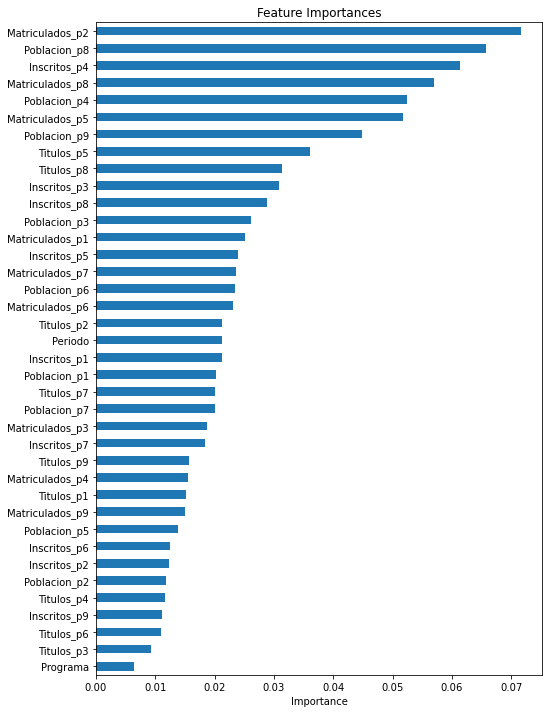

In [458]:
# Grafica las importancias en orden descendente
ii = np.argsort(GBR.feature_importances_)

importances = GBR.feature_importances_[ii]
predictors = predictors[ii]

plt.figure(figsize=(8,12))
a = pd.Series(importances, index=predictors)
a.plot(kind='barh')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [449]:
X_2021 = data_predict[predictors].copy()
X_2021['Periodo'] = X_2021.apply(lambda row: convert_period(row), axis=1)
X_2021['Programa'] = X_2021['Programa'].replace(programas, num)
X_2021 = X_2021.sort_values(by='Programa')
y_2021 = data_predict.sort_values(by='Programa')[target]

In [450]:
pd.DataFrame(list(zip(programas, grid_GBR.predict(X_2021).astype(int), y_2021.astype(int))), columns=['Programa', 'Predicción', 'Valor_real'])

,Programa,Predicción,Valor_real
0,Biología,16,47
1,Física,19,20
2,Geociencias,17,21
3,Matemáticas,9,12
4,Microbiología,15,38
5,Química,13,9
